# Import

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import math

%matplotlib inline
tickfontsize=20
labelfontsize = tickfontsize

import importlib
import efrc_ml_production as ml
importlib.reload(ml)

from rdkit import Chem

import xgboost as xgb

import datetime
import time

/home/modules/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/modules/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Begin hp opt

In [19]:
params = {'objective': 'reg:squarederror',
       'colsample_bytree': 0.5,
       'learning_rate': 0.15,
       'max_depth': 10,
       'alpha': 2,
       'n_estimators': 10}
#following must be defined
algo = 'xgb' #am I using XGBoost (xgb) or Neural Nets (nn)?
total_frac_hp = .1 #total fraction of data set to work with
training_pct = .6 #how much percent of total fraction should be used for training
random_split = True #make True if the training data should be chosen randomly
n_remote = 10000 #the n_remote most remote points will be added to training set if random_split = False
USE_PCA = True #should I use PCA?
N_COMPONENTS=400 #how many PCA Components should I use?
del_defective_mofs = False #make True if you want to remove all MOFs which a '0' value for at least one geometric property
cat_si_sd = True #make True if you want to concatenate size-indep and size-dep fps
add_size_fp = True #make True if you want to add 20 feature columns, where each feature is the number of atoms in a linker
srt_size_fp = True
size_dependent = True #make True if the input ML-ready data contains fingerprint which does not normalize each PG feature by number of atoms
stacked = False #make True if the input ML-ready data contains pressure as feature
n_core = 18 #number of cores to use
SD_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_no_norm/ml_data.csv' #path to size-dep data
SI_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_v1/ml_data.csv' #path to size-indep data
start_str_sd = 'CH4_v/v_248_bar'
end_str_sd = 'norm_Dom._Pore_(ang.)'
start_str_si = 'filename'
end_str_si = 'valence_pa'
del_geometric_fp = False #make True if you want to ignore the geometric features
cat_col_names = ['oh_1', 'oh_2', 'oh_3', 'oh_4'] #names for interpenetration columns
Y_DATA_PATH = '/data/rgur/efrc/data_DONOTTOUCH/hMOF_allData_March25_2013.xlsx' #path to original hMOF data
default_params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
                'max_depth':15, 'alpha':10, 'n_estimators':10}
n_trees_hp = 75 #number of weak learners. Bigger is better until 5000
save_pp = False #make True if you want to save the parity plot
#########################################################################

# Steps before hp_opt

In [5]:
if not stacked:
    ml_data_hp, property_used, target_mean, target_std, features = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac_hp, del_defective_mofs, add_size_fp, srt_size_fp, 
                                            size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)
if stacked:
    ml_data_hp, property_used, target_mean, target_std, features, p_info = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac_hp, del_defective_mofs, add_size_fp, srt_size_fp, 
                                            size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)



Using following 843 features
Mafp_Br1_C2_C1_si
Mafp_Br1_C2_C2_si
Mafp_Br1_C2_C3_si
Mafp_Br1_C3_Br1_si
Mafp_Br1_C3_C1_si
Mafp_Br1_C3_C2_si
Mafp_Br1_C3_C3_si
Mafp_Br1_C3_C4_si
Mafp_Br1_C3_N1_si
Mafp_Br1_C3_N2_si
Mafp_Br1_C3_N3_si
Mafp_Br1_C3_O1_si
Mafp_Br1_C4_Br1_si
Mafp_Br1_C4_C2_si
Mafp_Br1_C4_C3_si
Mafp_Br1_C4_C4_si
Mafp_Br1_C4_H1_si
Mafp_Br1_C4_N1_si
Mafp_Br1_C4_N2_si
Mafp_Br1_C4_N3_si
Mafp_Br1_C4_O1_si
Mafp_Br1_C4_O2_si
Mafp_Br1_N2_C2_si
Mafp_Br1_N2_C3_si
Mafp_Br1_N2_C4_si
Mafp_Br1_N2_N1_si
Mafp_Br1_N2_N2_si
Mafp_Br1_N2_N3_si
Mafp_Br1_N3_Br1_si
Mafp_Br1_N3_C2_si
Mafp_Br1_N3_C3_si
Mafp_Br1_N3_H1_si
Mafp_Br1_N3_N2_si
Mafp_Br1_N3_O2_si
Mafp_Br1_O2_C2_si
Mafp_Br1_O2_C3_si
Mafp_Br1_O2_C4_si
Mafp_C1_C2_C2_si
Mafp_C1_C2_C3_si
Mafp_C1_C2_C4_si
Mafp_C1_C2_F1_si
Mafp_C1_C2_H1_si
Mafp_C1_C2_O1_si
Mafp_C1_C2_O2_si
Mafp_C1_C3_C2_si
Mafp_C1_C3_C3_si
Mafp_C1_C3_C4_si
Mafp_C1_C3_Cl1_si
Mafp_C1_C3_F1_si
Mafp_C1_C3_H1_si
Mafp_C1_C3_N2_si
Mafp_C1_C3_N3_si
Mafp_C1_C3_O1_si
Mafp_C1_C3_O2_si
Mafp_C1_C4

Starting To Make Linker Size Columns
Starting to sort Linker Size Columns
Finished Making Linker Size Columns
The following columns have been dropped: ['norm_Mafp_C1_N2_N3', 'norm_Mafp_N2_O2_N3', 'norm_Mmfp_MQNs22', 'norm_Mmfp_MQNs23', 'norm_Mmfp_MQNs24', 'norm_Mmfp_MQNs25']


In [6]:
train_df_hp, test_df_hp= ml.trainTestSplit(ml_data_hp, property_used, training_pct, stacked, 
                                     n_core, random_split, n_remote, features, USE_PCA, N_COMPONENTS)

Total len of test_df + train_df: 12637


In [7]:
train_d_hp, test_d_hp, train_label_hp, test_label_hp = ml.alter_dtype(train_df_hp, test_df_hp, 
                                                                      property_used, n_core, algo, features)

In [8]:
len(train_label_hp) + len(test_label_hp)

12637

# Write functions

In [9]:
def objective(params):
    print("Size of training set %s" %len(train_label_hp))
    MODEL = ml.run_model(algo, train_d_hp, n_trees_hp, params)
    return ml.model_rmse(MODEL, train_d_hp, test_d_hp, stacked, algo, target_mean, target_std, property_used, 
                         test_label_hp, train_label_hp, save=False, fname=None, subset_inds=None)

# Perform optimization

Experiment with two hyperparameters in the model:<br>
<br>
1)Number of units in the first dense layer<br>
2)Learning rate<br>
3)Patience

In [10]:
from skopt import gp_minimize

In [11]:
space = [(.3, .95), #colsample_bytree
        (.01, .5),#learning_rate
        (2, 15), #max_depth
        (1, 20)] #alpha
        

In [12]:
start = time.time()
#r = gp_minimize(objective, space, n_calls=20, n_jobs=n_core)
r = gp_minimize(objective, space, n_calls=100)
end = time.time()
print("\nTime elapsed for hp opt: %s" %(end-start))

Size of training set 7582
Number of trees: 75
Elapsed time during model training:  4.218950271606445
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  2.570725440979004
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  0.7459733486175537
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.2357380390167236
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  1.0030455589294434
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  2.992091417312622
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  5.267845392227173
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  1.0037155151367188
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  6.083340167999268
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  2.08

Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.7827770709991455
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  1.252612829208374
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.76623797416687
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  2.890793561935425
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.3059778213500977
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  4.934309959411621
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.7037875652313232
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.444842576980591
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.1270341873168945
Size of training set 7582
Number of trees: 75
Elapsed time during model training:  3.399

In [14]:
r.x

[0.5059512981632465, 0.09815544929242098, 7, 1]

# Plot hp opt results

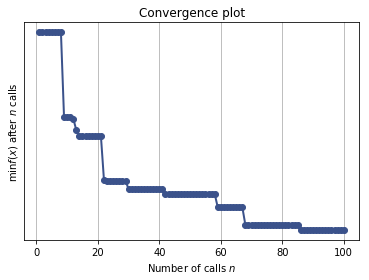

In [16]:
%matplotlib inline
from skopt.plots import plot_convergence
plot_convergence(r, yscale="log")

# Use best hps to train single model

In [20]:
n_trees = 5000
total_frac = 1

In [22]:
if not stacked:
    ml_data, property_used, target_mean, target_std, features = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                        SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                        total_frac, 
                                        del_defective_mofs, add_size_fp, srt_size_fp, size_dependent, stacked, n_core, 
                                        del_geometric_fp, cat_col_names, Y_DATA_PATH, return_features=False)
if stacked:
    ml_data, property_used, target_mean, target_std, features, p_info = ml.prepToSplit(cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac, del_defective_mofs, add_size_fp, srt_size_fp, size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):




Using following 843 features
Mafp_Br1_C2_C1_si
Mafp_Br1_C2_C2_si
Mafp_Br1_C2_C3_si
Mafp_Br1_C3_Br1_si
Mafp_Br1_C3_C1_si
Mafp_Br1_C3_C2_si
Mafp_Br1_C3_C3_si
Mafp_Br1_C3_C4_si
Mafp_Br1_C3_N1_si
Mafp_Br1_C3_N2_si
Mafp_Br1_C3_N3_si
Mafp_Br1_C3_O1_si
Mafp_Br1_C4_Br1_si
Mafp_Br1_C4_C2_si
Mafp_Br1_C4_C3_si
Mafp_Br1_C4_C4_si
Mafp_Br1_C4_H1_si
Mafp_Br1_C4_N1_si
Mafp_Br1_C4_N2_si
Mafp_Br1_C4_N3_si
Mafp_Br1_C4_O1_si
Mafp_Br1_C4_O2_si
Mafp_Br1_N2_C2_si
Mafp_Br1_N2_C3_si
Mafp_Br1_N2_C4_si
Mafp_Br1_N2_N1_si
Mafp_Br1_N2_N2_si
Mafp_Br1_N2_N3_si
Mafp_Br1_N3_Br1_si
Mafp_Br1_N3_C2_si
Mafp_Br1_N3_C3_si
Mafp_Br1_N3_H1_si
Mafp_Br1_N3_N2_si
Mafp_Br1_N3_O2_si
Mafp_Br1_O2_C2_si
Mafp_Br1_O2_C3_si
Mafp_Br1_O2_C4_si
Mafp_C1_C2_C2_si
Mafp_C1_C2_C3_si
Mafp_C1_C2_C4_si
Mafp_C1_C2_F1_si
Mafp_C1_C2_H1_si
Mafp_C1_C2_O1_si
Mafp_C1_C2_O2_si
Mafp_C1_C3_C2_si
Mafp_C1_C3_C3_si
Mafp_C1_C3_C4_si
Mafp_C1_C3_Cl1_si
Mafp_C1_C3_F1_si
Mafp_C1_C3_H1_si
Mafp_C1_C3_N2_si
Mafp_C1_C3_N3_si
Mafp_C1_C3_O1_si
Mafp_C1_C3_O2_si
Mafp_C1_C4

Starting to sort Linker Size Columns
Finished Making Linker Size Columns
The following columns have been dropped: ['norm_Mafp_C1_N2_N3', 'norm_Mafp_N2_O2_N3', 'norm_Mmfp_MQNs22', 'norm_Mmfp_MQNs23', 'norm_Mmfp_MQNs24', 'norm_Mmfp_MQNs25']


In [23]:
train_df, test_df= ml.trainTestSplit(ml_data, property_used, training_pct, stacked, 
                                     n_core, random_split, n_remote, features, USE_PCA, N_COMPONENTS)

if algo == 'xgb':
    train_d, test_d, train_label, test_label = ml.alter_dtype(train_df, test_df, property_used, n_core, algo, features)
else:
    train_d, test_d, train_label, test_label = ml.alter_dtype(train_df, test_df, property_used, n_core, algo, features)

len(train_label) + len(test_label)

# Run Single Model

#Good parameters

SAVE_FIG = False

Total len of test_df + train_df: 126369


In [24]:
params = r.x

Number of trees: 5000
Elapsed time during model training:  729.4162361621857
Test RMSE is 9.088533000115808


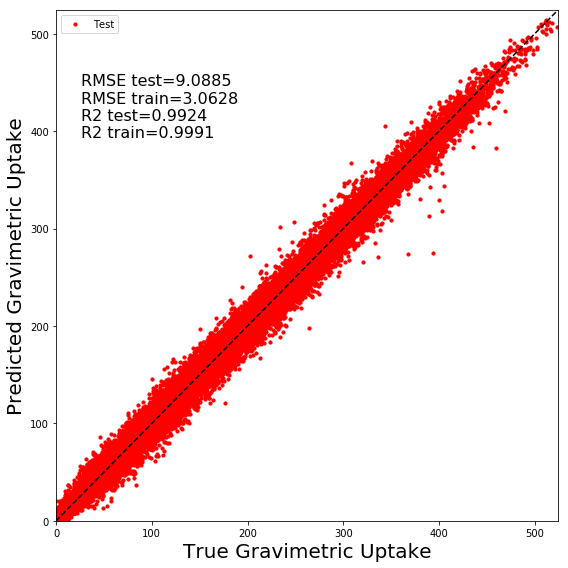

In [25]:
SAVE_FIG = False

MODEL = ml.run_model(algo, train_d, n_trees, params)
ml.parity_plot(MODEL, train_d, test_d, stacked, algo, target_mean, target_std, property_used, test_label, train_label, save=SAVE_FIG)

# Save model

In [26]:
now = datetime.datetime.now().strftime("%I:%M%p_on_%B_%d_%Y")
now

'03:49PM_on_April_14_2020'

In [27]:
print("colsample_bytree %s" %params[0])
print("learning_rate %s" %params[1])
print("max_depth %s" %params[2])
print("alpha %s" %params[3])

colsample_bytree 0.5059512981632465
learning_rate 0.09815544929242098
max_depth 7
alpha 1


In [28]:
SAVE_FIG = True

Test RMSE is 9.088533000115808


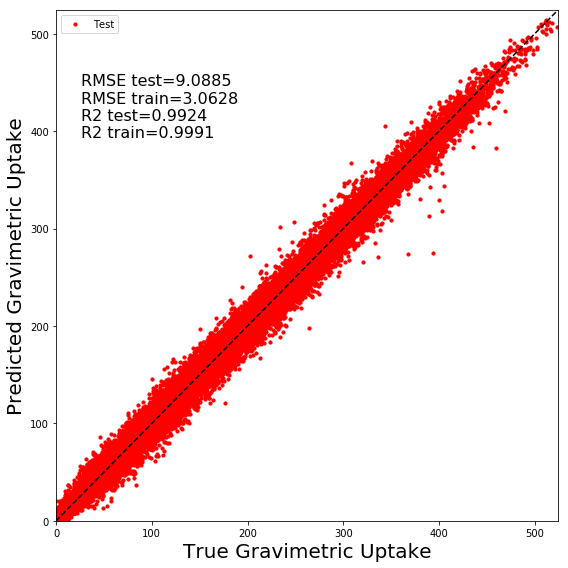

In [29]:
ml.parity_plot(MODEL, train_d, test_d, stacked, algo, target_mean, target_std, property_used, test_label, train_label, save=SAVE_FIG, fname=now)

In [30]:
#only run below to save

In [31]:
if algo=='xgb':
    MODEL.save_model('/data/rgur/efrc/ml/models/%s/%s.xgb' %(now, now))
else:
    MODEL.save('/data/rgur/efrc/ml/models/%s/%s.h5' %(now, now),save_format='h5')

In [32]:
train_df['filename'].to_csv('/data/rgur/efrc/ml/models/%s/train_%s.csv' %(now, now))

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [33]:
test_df['filename'].to_csv('/data/rgur/efrc/ml/models/%s/test_%s.csv' %(now, now))

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [34]:
import pickle

In [35]:
with open('/data/rgur/efrc/ml/models/%s/features_%s.pkl' %(now, now), 'wb') as f:
    pickle.dump(features, f, protocol=3)